<a href="https://colab.research.google.com/github/DarralJassal/Projects/blob/main/Cancer-Analysis-ML-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


### Q. Define the problem domain

The problem is building a machine learning model to precict whether people will be diagnosed with breast cancer based on test results before the doctor has looked at it and can make a deciison - this model will help inform the doctors decisions.

### Q. Identify candidate questions for your machine learning project

*   The label/output is whether any lumps are malignant or benign.

*  The inputs are the other data such as radius_mean, texture_mean,perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean and fractal_dimension_mean.

*   By predicting malignants and benign we will help the doctors make their deciison and hopefully also speed up the process.

*   We may also be able to tell which of the inputs has the most affect on whether someone is diagnosed with cancer, this will help us have a better understanding of the effects.








### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
!pip install azureml-core
!pip install azureml-dataset-runtime

     |████████████████████████████████| 2.5 MB 28.3 MB/s 
     |████████████████████████████████| 1.8 MB 39.7 MB/s 
     |████████████████████████████████| 78 kB 5.2 MB/s 
     |████████████████████████████████| 177 kB 56.0 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 412 kB 48.7 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 85 kB 3.6 MB/s 
     |████████████████████████████████| 141 kB 45.6 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 2.2 MB 54.2 MB/s 
     |████████████████████████████████| 146 kB 54.8 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 3.0 MB 44.3 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 210 kB 42.9 MB/s 
     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████

In [ ]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '906e552d-9aa1-4b23-9000-06b70083f2b6'
resource_group = 'donkeykong'
workspace_name = 'ML-DJ'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='cancer analysis')
dataset.to_pandas_dataframe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


In [ ]:
data = dataset.to_pandas_dataframe()
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1138.0,1.523243e+07,8.965268e+07,8670.00000,92995.25000,93279.50000,906012.50000,9.113205e+08
radius_mean,1138.0,1.412729e+01,3.522499e+00,6.98100,11.70000,13.37000,15.78000,2.811000e+01
texture_mean,1138.0,1.928965e+01,4.299144e+00,9.71000,16.17000,18.84000,21.80000,3.928000e+01
perimeter_mean,1138.0,9.196903e+01,2.428829e+01,43.79000,75.17000,86.24000,104.10000,1.885000e+02
area_mean,1138.0,6.548891e+02,3.517593e+02,143.50000,420.30000,551.10000,782.70000,2.501000e+03
smoothness_mean,1138.0,9.636028e-02,1.405794e-02,0.05263,0.08637,0.09587,0.10530,1.634000e-01
compactness_mean,1138.0,1.043410e-01,5.278953e-02,0.01938,0.06492,0.09263,0.13040,3.454000e-01
concavity_mean,1138.0,8.879932e-02,7.968474e-02,0.00000,0.02956,0.06154,0.13070,4.268000e-01
symmetry_mean,1138.0,1.811619e-01,2.740222e-02,0.10600,0.16190,0.17920,0.19570,3.040000e-01
fractal_dimension_mean,1138.0,6.279761e-02,7.057257e-03,0.04996,0.05770,0.06154,0.06612,9.744000e-02


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [ ]:
corrs = data.corr()
corrs

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


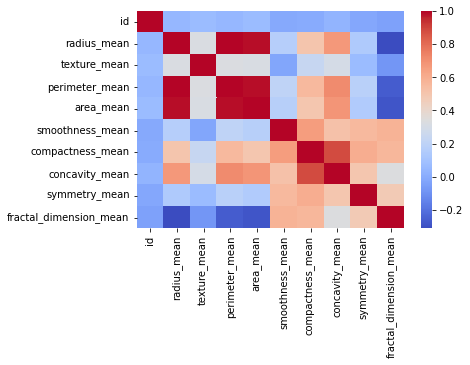

In [ ]:
import seaborn as sns
sns.heatmap(corrs, cmap='coolwarm') 

In [ ]:
# in english not python- rationale why you choose to select or drop columns

We would drop any column with null values to make sure the model works.

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

For MCAR -->we remove the column
For MNAR -->remove the missing values from the dataset
For MAR --> remove the column from training as it is no use for production.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 842302 to 93320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               1138 non-null   object 
 1   radius_mean             1138 non-null   float64
 2   texture_mean            1138 non-null   float64
 3   perimeter_mean          1138 non-null   float64
 4   area_mean               1138 non-null   float64
 5   smoothness_mean         1138 non-null   float64
 6   compactness_mean        1138 non-null   float64
 7   concavity_mean          1138 non-null   float64
 8   symmetry_mean           1138 non-null   float64
 9   fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), object(1)
memory usage: 97.8+ KB


In [ ]:
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
y = data.loc[:,['diagnosis']]
x = data.iloc[:,1:]

In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [ ]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,796.0,14.195644,3.545539,6.98100,11.750000,13.490000,16.080000,28.11000
texture_mean,796.0,19.297940,4.271037,9.71000,16.320000,18.900000,21.780000,39.28000
perimeter_mean,796.0,92.447626,24.433297,43.79000,75.490000,87.210000,105.100000,188.50000
area_mean,796.0,661.234799,355.583404,143.50000,426.700000,561.150000,799.100000,2501.00000
smoothness_mean,796.0,0.096455,0.014311,0.05263,0.085880,0.096035,0.105925,0.16340
compactness_mean,796.0,0.105215,0.053056,0.01938,0.066017,0.095630,0.130500,0.34540
concavity_mean,796.0,0.090072,0.079857,0.00000,0.029740,0.063870,0.132325,0.42680
symmetry_mean,796.0,0.181789,0.027969,0.12030,0.161800,0.179400,0.196700,0.30400
fractal_dimension_mean,796.0,0.062858,0.007188,0.04996,0.057637,0.061455,0.066215,0.09744


In [ ]:
xmean=stats['mean']
xstd = stats['std']
xtrain_norm=((xtrain-xmean)/xstd)
xtest_norm=((xtest-xmean)/xstd)

In [ ]:
logic = { 'M': 1, 'B': 0}
ytrain_enc = ytrain['diagnosis'].apply(lambda x: logic[x])
ytest_enc=ytest['diagnosis'].apply(lambda x: logic[x])

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
862965,-0.568502,0.286127,-0.623233,-0.569585,-1.140743,-1.222023,-0.829509,-0.282076,-0.846993
907914,0.198660,0.756739,0.395050,0.066834,0.210711,2.210591,2.294445,0.797682,0.851691
92950,1.405811,0.747374,1.434615,1.368920,-0.784362,0.708398,0.267075,-0.181966,-1.052895
897132,-0.839264,0.131598,-0.839331,-0.770381,0.625091,-0.705397,-1.065230,0.436571,-0.358674
871001502,-1.685680,0.328272,-1.603452,-1.286153,-0.168032,0.476567,0.526287,1.444821,2.747930


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model1 = SGDClassifier() 
model1.fit(xtrain_norm, ytrain_enc)

SGDClassifier()

In [ ]:
model2 = LinearSVC()
model2.fit(xtrain_norm, ytrain_enc)

LinearSVC()

In [ ]:
model3 = GaussianNB()
model3.fit(xtrain_norm, ytrain_enc)

GaussianNB()

In [ ]:
model4 = DecisionTreeClassifier()
model4.fit(xtrain_norm, ytrain_enc)

DecisionTreeClassifier()

In [ ]:
model5 = RandomForestClassifier()
model5.fit(xtrain_norm, ytrain_enc)

RandomForestClassifier()

In [ ]:
model6 = KNeighborsClassifier()
model6.fit(xtrain_norm, ytrain_enc)

KNeighborsClassifier()

In [ ]:
predictions1 = model1.predict(xtest_norm)
predictions2 = model2.predict(xtest_norm)
predictions3 = model3.predict(xtest_norm)
predictions4 = model4.predict(xtest_norm)
predictions5 = model5.predict(xtest_norm)
predictions6 = model6.predict(xtest_norm)

In [ ]:
predictions1

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
predictions6

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

In [ ]:
SGDClassifier_accuracy = accuracy_score(ytest_enc, predictions1, normalize=True)
SGDClassifier_accuracy

0.9415204678362573

In [ ]:
LinearSVC_accuracy = accuracy_score(ytest_enc, predictions2, normalize=True)
LinearSVC_accuracy

0.9415204678362573

In [ ]:
GaussianNB_accuracy = accuracy_score(ytest_enc, predictions3, normalize=True)
GaussianNB_accuracy

0.9239766081871345

In [ ]:
DecisionTree_accuracy = accuracy_score(ytest_enc, predictions4, normalize=True)
DecisionTree_accuracy

0.9883040935672515

In [ ]:
RandomForestClassifier_accuracy = accuracy_score(ytest_enc, predictions5, normalize=True)
RandomForestClassifier_accuracy

0.9707602339181286

In [ ]:
KNeighbours_accuracy = accuracy_score(ytest_enc, predictions6, normalize=True)
KNeighbours_accuracy

0.9502923976608187

In [ ]:
#precision score for model 4 as it had the highest accuracy

precision_score(ytest_enc, predictions4)

0.9831932773109243

In [ ]:
#cross validation for model 4 as it had the highest accuracy

cross_val_score(model4, xtrain_norm, ytrain, cv=5)

#model isn't biased towards any of these 5 results.

array([0.925     , 0.98113208, 0.96226415, 0.94968553, 0.93081761])

From our test I can tell that the Decision Tree model (model 4) has the best accuracy and is thus the best mode. All models are above 90% accurate and so we could use any of them but with cancer analysis we want the most accuracte to help the doctors.

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
import pickle
pickle.dump(model, open('BCA_model.pkl', 'wb'))

In [ ]:
print(sklearn.__version__)

1.0.2


In [ ]:
#python own model

import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here - not sure what I did wrong but added in data and still not running.
data =     {
                'id': "0",
                'radius_mean': "0",
                'texture_mean': "0",
                'perimeter_mean': "0",
                'area_mean': "0",
                'smoothness_mean': "0",
                'compactness_mean': "0",
                'concavity_mean': "0",
                'symmetry_mean': "0",
                'fractal_dimension_mean': "0"
                }
    

body = str.encode(json.dumps(data))

url = 'http://a0b25e73-725c-4fec-8243-4ffba8bc2eb0.eastus2.azurecontainer.io/score'
api_key = 
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Fri, 21 Jan 2022 14:42:48 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 80bd2e3f-d7d6-44d7-b68a-ae8394f35af4
X-Ms-Run-Fn-Exec-Ms: 0.333
X-Ms-Run-Function-Failed: False
Connection: close


{'status_code': 400, 'message': 'Missing parameter in body: data'}


In [ ]:
#auto ml model

import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
        "data":
        [
            {
                'id': "0",
                'radius_mean': "0",
                'texture_mean': "0",
                'perimeter_mean': "0",
                'area_mean': "0",
                'smoothness_mean': "0",
                'compactness_mean': "0",
                'concavity_mean': "0",
                'symmetry_mean': "0",
                'fractal_dimension_mean': "0",
            },
        ],
    },
    "GlobalParameters": {
        'method': "predict",
    }
}

body = str.encode(json.dumps(data))

url = 'http://eaebab13-aba0-4857-9d82-4f70782be2d6.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'{"Results": ["B"]}'
